# Wuhan Corona Virus Outbreak

- webscraped infected counts from national health commision via wikipedia
- infection counts are fitted to a simple exponential distribution 


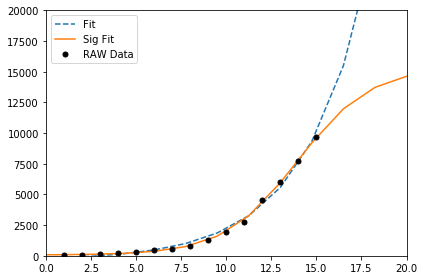

In [153]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bs4 import BeautifulSoup

%matplotlib inline

url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Wuhan_coronavirus_outbreak'
page = requests.get(url).text
soup = BeautifulSoup(page,'lxml')
#print(soup.prettify())
My_table = soup.find('div',{'class':'barbox tright'})

datesfinal = []
countsfinal = []

dates = My_table.findAll('td', colspan = '2', style='padding-right:0.4em; padding-left:0.4em')

for date in dates:
    datesfinal.append((pd.to_datetime(date.get_text())))
    
counts = My_table.findAll('td', colspan = '2', style='min-width:3em;padding-left:0.4em; text-align:right')

for count in counts:
    countsfinal.append(int(count.get_text().replace(',','')))  
    
d=list(zip(datesfinal, countsfinal))
df=pd.DataFrame(data=d, columns=['Date','Infected'])    

def exponential_fit(x, a, b, c):
    return a*np.exp(b*x) + c

def sigmoidal_fit(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

x = np.linspace(1,len(df),len(df))
y = np.array(df['Infected'])


fitting_parameters_exp, covariance = curve_fit(exponential_fit, x, y)
a, b, c = fitting_parameters_exp

p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
fitting_parameters_sig, covariance_sig = curve_fit(sigmoidal_fit, x, y,p0, method='dogbox')
a2, b2, c2, d2 = fitting_parameters_sig

x_min = -1 
x_max = 20 
x_fit = np.linspace(x_min, x_max, 13) 

plt.plot(x_fit, exponential_fit(x_fit, *fitting_parameters_exp), '--', label='Fit')
plt.plot(x_fit, sigmoidal_fit(x_fit, *fitting_parameters_sig), '-', label='Sig Fit')
plt.plot(x, y, '.', label='RAW Data', color='k', markersize=10)

plt.plot(title='Wuhan')
plt.ylim(0, 20000)
plt.xlim(0,20)
plt.tight_layout()
plt.legend()

plt.show()




(-5, 25)

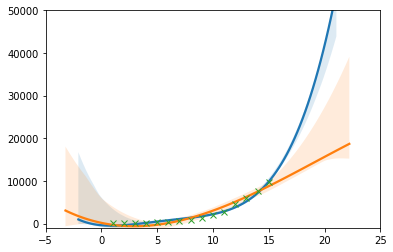

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=x_fit,y=exponential_fit(x_fit, *fitting_parameters_exp),order=4, ci=95, label = 'exponential', scatter_kws=dict(alpha=0))
sns.regplot(x=x_fit,y=sigmoidal_fit(x_fit, *fitting_parameters_sig),order=3, ci=95, label = 'sigmoidal', scatter_kws=dict(alpha=0))
plt.plot(x, y, 'x', label='Wuhan data')

plt.ylim(-1000, 50000)
plt.xlim(-5, 25)



In [143]:
df

,Date,Infected
0,2020-01-16,45
1,2020-01-17,62
2,2020-01-18,121
3,2020-01-19,198
4,2020-01-20,291
5,2020-01-21,440
6,2020-01-22,571
7,2020-01-23,830
8,2020-01-24,1287
9,2020-01-25,1975


In [27]:
x,y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 array([  45,   62,  121,  198,  291,  440,  571,  830, 1287, 1975, 2744,
        4515, 5974, 7711], dtype=int64))

In [28]:
curve_fit(exponential_fit, x, y)

(array([  90.38985879,    0.32142167, -178.90818136]),
 array([[ 5.34061080e+02, -4.19831807e-01, -2.24098069e+03],
        [-4.19831807e-01,  3.32569361e-04,  1.70062255e+00],
        [-2.24098069e+03,  1.70062255e+00,  1.36620364e+04]]))